In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import molsysmt as msm
import numpy as np
import matplotlib.pyplot as plt

# Get center

## get_geometric_center

In [3]:
molecular_system = msm.demo['pentalanine']['traj.h5']
molecular_system = msm.convert(molecular_system, to_form='molsysmt.MolSys')

In [4]:
center = msm.structure.get_geometric_center(molecular_system)

/home/diego/MyMachine/locals/miniconda3/envs/MolSysMT@dprada_3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


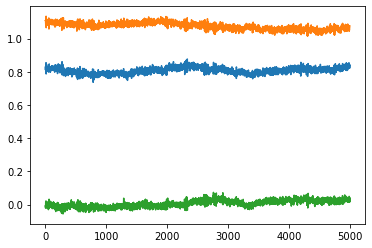

In [5]:
plt.plot(center[:,0,0])
plt.plot(center[:,0,1])
plt.plot(center[:,0,2])
plt.show()

In [6]:
center_group_0 = msm.structure.get_geometric_center(molecular_system, selection='group_index==0')
center_group_1 = msm.structure.get_geometric_center(molecular_system, selection='group_index==1')
distance_groups = msm.structure.get_distances(center_group_0, molecular_system_2=center_group_1)

In [7]:
distance_groups_2 = msm.structure.get_distances(molecular_system, selection='group_index==0', group_behavior='geometric_center',
                                                                  selection_2='group_index==1', group_behavior_2='geometric_center')

In [8]:
np.allclose(distance_groups, distance_groups_2)

True

## get_center_of_mass

In [9]:
#center = msm.structure.get_center_of_mass(molecular_system, selection='group_index==0')

## get any weighted  center

In [10]:
list_CAs = msm.select(molecular_system, selection='atom_name=="CA"')
n_atoms_CAs = list_CAs.shape[0]

In [11]:
center = msm.structure.get_center(molecular_system, selection=list_CAs, weights=np.ones(n_atoms_CAs))